# UBC Scientific Software
## Otober 14, 2016

Today's Agenda:
* Example: Diabetes dataset linea regression
* Example:Digits dataset with K-nearest neighbors classfiers

In [18]:
import numpy as np
## numpy is for numerical
import matplotlib.pyplot as plt
import pandas as pd
## spreadsheet like data analysis
%matplotlib inline
## when you do plots it appears in the notebook

In [19]:
from sklearn.datasets import load_diabetes

In [20]:
diabetes = load_diabetes()

In [21]:
diabetes.keys()

dict_keys(['data', 'target'])

In [57]:
X = diabetes.data
Y = diabetes.target

In [58]:
X.shape

(442, 10)

In [59]:
Y.shape

(442,)

In [60]:
X[:5,:3]

array([[ 0.03807591,  0.05068012,  0.06169621],
       [-0.00188202, -0.04464164, -0.05147406],
       [ 0.08529891,  0.05068012,  0.04445121],
       [-0.08906294, -0.04464164, -0.01159501],
       [ 0.00538306, -0.04464164, -0.03638469]])

In [61]:
Y[:5]

array([ 151.,   75.,  141.,  206.,  135.])

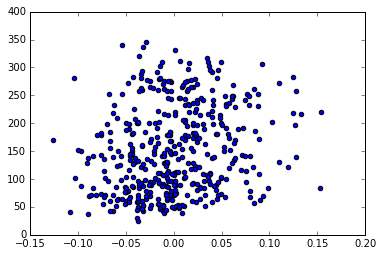

In [62]:
## 
plt.scatter(X[:,4],Y)

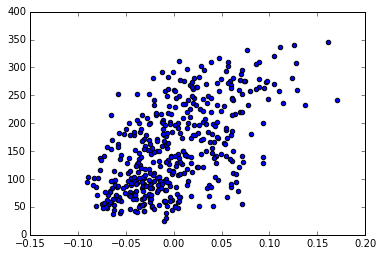

In [63]:
## Using the BMI
plt.scatter(X[:,2],Y)

In [64]:
from sklearn.linear_model import LinearRegression

In [67]:
reg = LinearRegression()

In [68]:
bmi = X[:,2]
reg.fit(bmi.reshape(442,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
reg.coef_

array([ 949.43526038])

In [71]:
reg.intercept_

152.13348416289671

In [73]:
x_test = np.linspace(-0.15,0.2,10)
y_test = reg.predict(x_test.reshape(10,1))

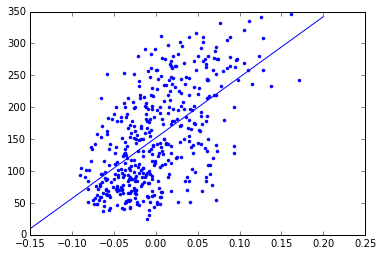

In [74]:
plt.plot(x_test,y_test,X[:,2],y,'b.')

In [76]:
reg.score(bmi.reshape(442,1),Y)

0.34392376022538029

In [77]:
reg2 = LinearRegression()

In [78]:
reg2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
reg2.score(X,Y)

0.51774942541329338

The above method is supervised learning
discrete output is classification

In [83]:
from sklearn.datasets import load_digits

In [84]:
digits = load_digits()

In [85]:
digits.keys()

dict_keys(['target', 'data', 'images', 'DESCR', 'target_names'])

In [87]:
print(digits.DESCR)
digits.data.shape

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

(1797, 64)

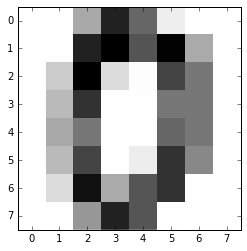

In [94]:
plt.imshow(digits.images[0,:,:], cmap = 'binary', interpolation = 'none')

In [96]:
digits.images[0,:,:]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

When the output is discrete, we call them classification problem. 

### K-nearest neighborurs

In [97]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [98]:
clf = knn()

In [99]:
N = 1500
X_train = digits.data[:N,:]
y_train = digits.target[:N]
X_test = digits.data[N:]
y_test = digits.target[N:]

In [101]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
clf.score(X_train,y_train)

0.99133333333333329

In [104]:
clf.score(X_test,y_test)

0.95622895622895621

In [105]:
clf.predict(X_test[0].reshape(1,64))

array([1])

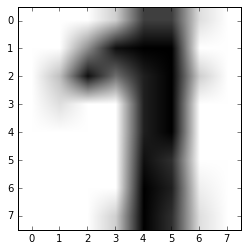

In [112]:
plt.imshow(X_test[0].reshape(8,8), cmap = 'binary')